In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# reading data
df = pd.read_csv('../github/hidden_features_df.csv', index_col="Unnamed: 0")
#df = pd.read_csv('hidden_features_df.csv', index_col="Unnamed: 0")

In [9]:
# showing 5 first registers
df.head(5) 

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,8,0.0,11.246423,0.0,7.995950,9.410959,19.745337,9.010060,8.527996,10.110795,19.589340
1,8,0.0,13.312637,0.0,10.743755,11.378502,18.715256,11.810072,11.065614,12.528616,18.708977
2,5,0.0,0.000000,0.0,0.000000,0.000000,28.648830,0.000000,0.000000,0.000000,30.524609
3,5,0.0,0.000000,0.0,0.000000,0.000000,26.991035,0.000000,0.000000,0.000000,29.041384
4,8,0.0,5.038842,0.0,5.323320,5.368689,22.266983,4.806798,4.124915,4.903548,23.818264


In [10]:
# checking if feature_1 and feature_3 have all zeros
counts_feature1 = df.groupby('feature_1')['feature_1'].value_counts()
print(counts_feature1)

counts_feature3 = df.groupby('feature_3')['feature_3'].value_counts()
print(counts_feature3)

feature_1  feature_1
0.0        0.0          9370
Name: feature_1, dtype: int64
feature_3  feature_3
0.0        0.0          9370
Name: feature_3, dtype: int64


In [11]:
# dropping feature_1 and feature_3
df = df.drop(['feature_1', 'feature_3'], axis=1)

In [12]:
# Plotting the correlation heatmap

# Selecting the features
df_features = df.drop(['label'], axis=1)

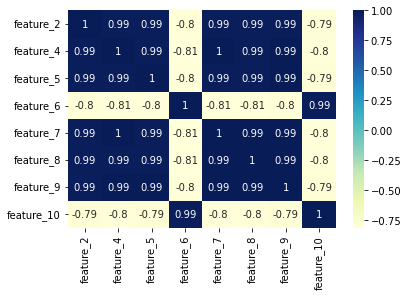

In [13]:
sns.heatmap(df_features.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [24]:
from scipy.stats import pearsonr

In [25]:
features = ['feature_2', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']

corr_matrix = np.corrcoef(df_features[features].values.T)

In [26]:
# print the correlation matrix
print(corr_matrix)

[[ 1.          0.98681048  0.9888875  -0.7996947   0.98783106  0.99060721
   0.99269351 -0.79114215]
 [ 0.98681048  1.          0.99054977 -0.81386609  0.99516642  0.99270598
   0.99319632 -0.80019821]
 [ 0.9888875   0.99054977  1.         -0.80307158  0.99052858  0.98710835
   0.99305055 -0.78968841]
 [-0.7996947  -0.81386609 -0.80307158  1.         -0.81257573 -0.81427296
  -0.80372807  0.98907079]
 [ 0.98783106  0.99516642  0.99052858 -0.81257573  1.          0.99473772
   0.99302256 -0.80091406]
 [ 0.99060721  0.99270598  0.98710835 -0.81427296  0.99473772  1.
   0.99361247 -0.80499724]
 [ 0.99269351  0.99319632  0.99305055 -0.80372807  0.99302256  0.99361247
   1.         -0.79205211]
 [-0.79114215 -0.80019821 -0.78968841  0.98907079 -0.80091406 -0.80499724
  -0.79205211  1.        ]]


In [27]:
for i, feat1 in enumerate(features):
    for j, feat2 in enumerate(features):
        if i < j:
            corr_coef, p_value = pearsonr(df[feat1], df[feat2])
            print("Correlation coefficient between", feat1, "and", feat2, ":", corr_coef)
            print("p-value for the correlation between", feat1, "and", feat2, ":", p_value)

Correlation coefficient between feature_2 and feature_4 : 0.9868104812179446
p-value for the correlation between feature_2 and feature_4 : 0.0
Correlation coefficient between feature_2 and feature_5 : 0.9888875030570793
p-value for the correlation between feature_2 and feature_5 : 0.0
Correlation coefficient between feature_2 and feature_6 : -0.7996946969924587
p-value for the correlation between feature_2 and feature_6 : 0.0
Correlation coefficient between feature_2 and feature_7 : 0.9878310550625313
p-value for the correlation between feature_2 and feature_7 : 0.0
Correlation coefficient between feature_2 and feature_8 : 0.9906072090151792
p-value for the correlation between feature_2 and feature_8 : 0.0
Correlation coefficient between feature_2 and feature_9 : 0.9926935079755755
p-value for the correlation between feature_2 and feature_9 : 0.0
Correlation coefficient between feature_2 and feature_10 : -0.7911421462830092
p-value for the correlation between feature_2 and feature_10 :